In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
from sklearn.datasets import load_breast_cancer
files = load_breast_cancer()
df = pd.DataFrame(files.data, columns=files.feature_names)
df['target']=files.target
df['target'] = df.target.apply(lambda x : files.target_names[x])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [215]:
#sns.pairplot(df, hue='target')

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- 이상치 유무 확인

C:\Users\ICT01_02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


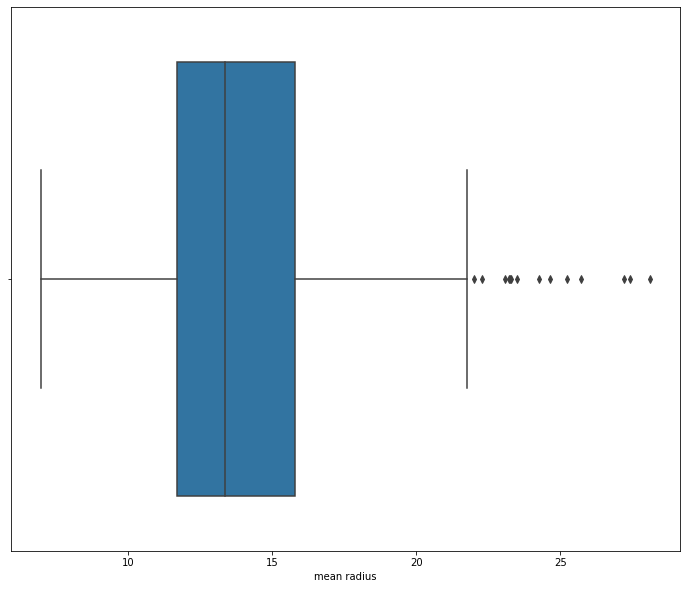

In [217]:
plt.figure(figsize=(12,10))
sns.boxplot(df.iloc[:,0])
plt.show()

C:\Users\ICT01_02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


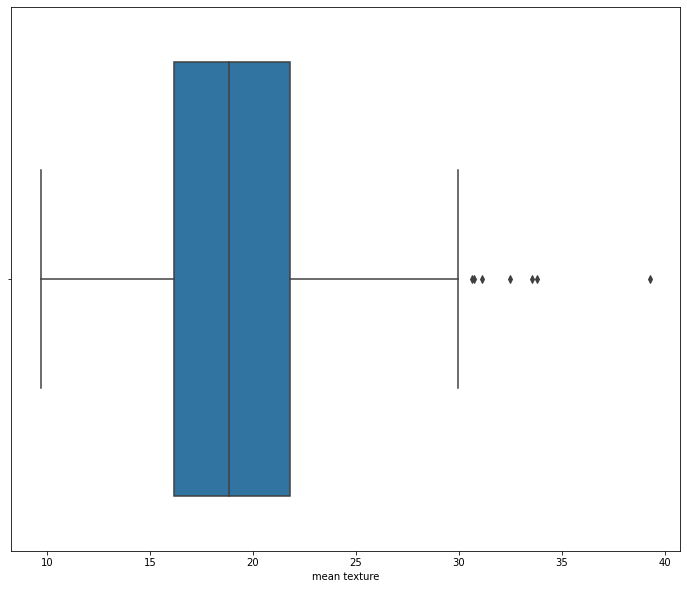

In [218]:
plt.figure(figsize=(12,10))
sns.boxplot(df.iloc[:,1])
plt.show()

- 대충봐도 이상치 모든 열에 존재,, 이상치 찾아서 평균치로 바꾸는 함수 ㄱㄱ

In [219]:
def outlier(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    a= np.where((data > upper) | (data < lower))
    for i in a:
        print(data[i])
        plt.scatter(data[i], df.target[i])
        data[i] = data.mean()

- 잘 바꼈는지 확인

<ipython-input-219-d9f396809af5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data.mean()


82     25.22
108    22.27
122    24.25
164    23.27
180    27.22
202    23.29
212    28.11
236    23.21
339    23.51
352    25.73
369    22.01
461    27.42
503    23.09
521    24.63
Name: mean radius, dtype: float64


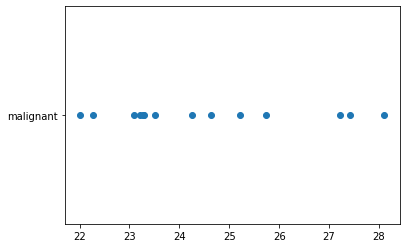

In [220]:
outlier(df.iloc[:,0])

In [221]:
df['mean radius'][[82,108,122,164,180]]

82     14.127292
108    14.127292
122    14.127292
164    14.127292
180    14.127292
Name: mean radius, dtype: float64

for문 돌려서 모든 열에 적용 

In [222]:
df.values

array([[17.99, 10.38, 122.8, ..., 0.4601, 0.1189, 'malignant'],
       [20.57, 17.77, 132.9, ..., 0.275, 0.08902, 'malignant'],
       [19.69, 21.25, 130.0, ..., 0.3613, 0.08758, 'malignant'],
       ...,
       [16.6, 28.08, 108.3, ..., 0.2218, 0.0782, 'malignant'],
       [20.6, 29.33, 140.1, ..., 0.4087, 0.124, 'malignant'],
       [7.76, 24.54, 47.92, ..., 0.2871, 0.07039, 'benign']], dtype=object)

In [223]:
c= np.arange(10)
d=np.arange(10,20)

In [224]:
np.column_stack((c,d))

array([[ 0, 10],
       [ 1, 11],
       [ 2, 12],
       [ 3, 13],
       [ 4, 14],
       [ 5, 15],
       [ 6, 16],
       [ 7, 17],
       [ 8, 18],
       [ 9, 19]])

In [225]:
df.columns.value_counts().sum()

31

In [ ]:
for i in len(df.columns):

In [226]:
def outlier1(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    a= np.where((data > upper) | (data < lower))
    for i in a:
        data[i] = data.mean()
# 모든 열에 적용
for i in range(30):
    outlier1(df.iloc[:,i])

df
    

<ipython-input-226-959fe4907a32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data.mean()
<ipython-input-226-959fe4907a32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data.mean()
<ipython-input-226-959fe4907a32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data.mean()
<ipython-input-226-959fe4907a32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990000,10.38,122.80,1001.000000,0.11840,0.104341,0.088799,0.14710,0.241900,0.078710,...,17.33,184.60,880.583128,0.162200,0.254265,0.711900,0.2654,0.290076,0.118900,malignant
1,20.570000,17.77,132.90,1326.000000,0.08474,0.078640,0.086900,0.07017,0.181200,0.056670,...,23.41,158.80,880.583128,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020,malignant
2,19.690000,21.25,130.00,1203.000000,0.10960,0.159900,0.197400,0.12790,0.206900,0.059990,...,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580,malignant
3,11.420000,20.38,77.58,386.100000,0.09636,0.104341,0.241400,0.10520,0.181162,0.062798,...,26.50,98.87,567.700000,0.132369,0.254265,0.686900,0.2575,0.290076,0.083946,malignant
4,20.290000,14.34,135.10,1297.000000,0.10030,0.132800,0.198000,0.10430,0.180900,0.058830,...,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.871672,22.39,142.00,654.889104,0.11100,0.115900,0.243900,0.13890,0.172600,0.056230,...,26.40,166.10,880.583128,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150,malignant
565,20.130000,28.25,131.20,1261.000000,0.09780,0.103400,0.144000,0.09791,0.175200,0.055330,...,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370,malignant
566,16.600000,28.08,108.30,858.100000,0.08455,0.102300,0.092510,0.05302,0.159000,0.056480,...,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200,malignant
567,20.600000,29.33,140.10,1265.000000,0.11780,0.104341,0.088799,0.15200,0.239700,0.070160,...,39.42,184.60,1821.000000,0.165000,0.254265,0.272188,0.2650,0.408700,0.083946,malignant


- train, test data set

In [227]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021, test_size=0.3
)

- 표준화 ㄱㄱ

In [229]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

- 랜덤 포레스트

In [230]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train_std, y_train)
rfc.score(X_test_std, y_test)

0.9707602339181286

- 머이래 높음? 하지만 더 높이기 위해 파라메타 튜닝

In [231]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}

In [232]:
param = {'max_depth' : [1,2,3,4,5], 'max_leaf_nodes' : [2,3,4,5], 'min_samples_split' : [2,3,4,5]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rfc,param, scoring='accuracy',n_jobs=-1, cv=3, verbose=1)
grid.fit(X_train_std, y_train)
grid.score(X_test_std, y_test)  # 더 낮아짐 쒯

Fitting 3 folds for each of 80 candidates, totalling 240 fits


0.9590643274853801

In [233]:
grid.best_params_ # max_leaf와 min_samples 값 수정 필요

{'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 5}

In [234]:
param = {'max_depth' : [1,2,3,4,5], 'max_leaf_nodes' : [2,3,4,5,6,7], 'min_samples_split' : [1,2,3,4,5,6,7]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rfc,param, scoring='accuracy',n_jobs=-1, cv=3, verbose=1)
grid.fit(X_train_std, y_train)
grid.score(X_test_std, y_test)  # 처음이랑 같은 값??

Fitting 3 folds for each of 210 candidates, totalling 630 fits


C:\Users\ICT01_02\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.9020278  0.9020278  0.9020278  0.9020278  0.9020278
 0.9020278         nan 0.9020278  0.9020278  0.9020278  0.9020278
 0.9020278  0.9020278         nan 0.9020278  0.9020278  0.9020278
 0.9020278  0.9020278  0.9020278         nan 0.9020278  0.9020278
 0.9020278  0.9020278  0.9020278  0.9020278         nan 0.9020278
 0.9020278  0.9020278  0.9020278  0.9020278  0.9020278         nan
 0.9020278  0.9020278  0.9020278  0.9020278  0.9020278  0.9020278
        nan 0.9020278  0.9020278  0.9020278  0.9020278  0.9020278
 0.9020278         nan 0.92215387 0.92215387 0.92215387 0.92215387
 0.92215387 0.92215387        nan 0.92967267 0.92967267 0.92967267
 0.92967267 0.92967267 0.92967267        nan 0.92967267 0.92967267
 0.92967267 0.92967267 0.92967267 0.92967267        nan 0.92967267
 0.92967267 0.92967267 0.92967267 0.92967267 0.92967267  

0.9532163742690059

- 정규화 했을때 한번 보자

In [235]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.fit_transform(X_test)

- 랜덤 포레스트

In [238]:
from sklearn.ensemble import RandomForestClassifier
rfc_mms = RandomForestClassifier(random_state=2021)
rfc_mms.fit(X_train_mms, y_train)
rfc_mms.score(X_test_mms, y_test) # 랜덤 스테이트 주고 높아짐!

0.9707602339181286

In [237]:
# 약 mean radius 가 17이상부터 양성 반응 나타남 새로운 데이터 생성
#df['mean_radius17'] = np.where(df['mean radius'] >= 17,1,0)
#df2 = df.drop(columns='mean radius', inplace=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
